In [1]:
#importing important dependencies
import numpy as np
import pandas as pd


In [2]:
#loading the dataset to a pandas Dataframe
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [3]:
df.head(20)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
# number of rows and columns
df.shape

(5572, 5)

#  1 Data cleaning

In [5]:
#checking number of null values 
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
#checking dubliacted value
df.duplicated().sum()

403

In [7]:
#drop dubliacted values
df=df.drop_duplicates(keep='first')

In [8]:
#checking dubliacted value
df.duplicated().sum()

0

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
# 0=not spam
#1= spam
label_encoder=LabelEncoder()

In [11]:
df['v1']=label_encoder.fit_transform(df['v1'])

In [12]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [13]:
#rename the columns
df=df.rename(columns={'v1':'label','v2':'text'})

In [14]:
df.head()

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [16]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
#to check the how many sms are spam and how may sms are not spam
df['label'].value_counts()

0    4516
1     653
Name: label, dtype: int64

# 2 EDA (Exploratory Data Analysis)

In [18]:
import matplotlib.pyplot  as plt

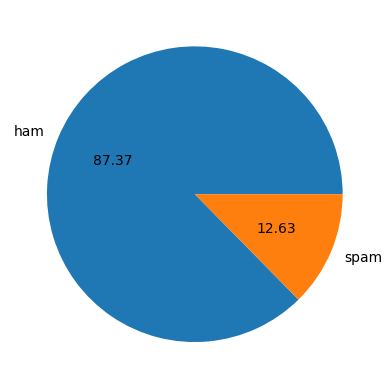

In [19]:
#pie plot generally used for showing the percentage of spam and ham
plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

****data is imbalanced so we need to balance it****

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
#to check the lenth of text
df['charcters']=df['text'].apply(len)

In [23]:
df.head()

,label,text,charcters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
# to check number of words in given text
df['words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.head()

,label,text,charcters,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
# to check number of sentence in given text
df['sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,label,text,charcters,words,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
#it used for find number of count ,mean,std etc of a given colums
df[['charcters','words','sentence']].describe()

,charcters,words,sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
#ham
df[df['label']==0][['charcters','words','sentence']].describe()

,charcters,words,sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
#spam
df[df['label']==1][['charcters','words','sentence']].describe()

,charcters,words,sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [31]:
import seaborn as sns

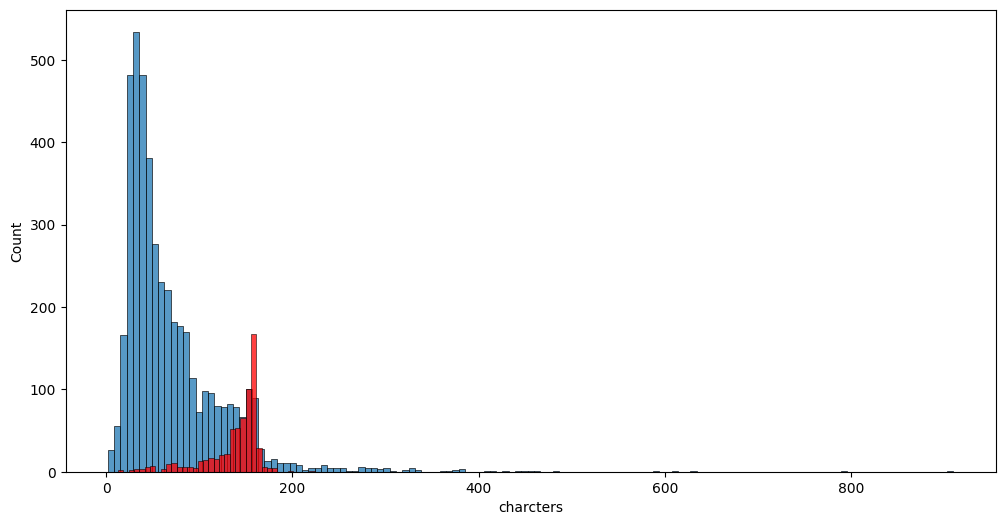

In [32]:
#to visualize the distribution of a dataset and identify any patterns, anomalies, or skewness in the data.
plt.figure(figsize=(12,6))
sns.histplot(df[df['label']==0]['charcters'])
sns.histplot(df[df['label']==1]['charcters'],color='red')
plt.show()

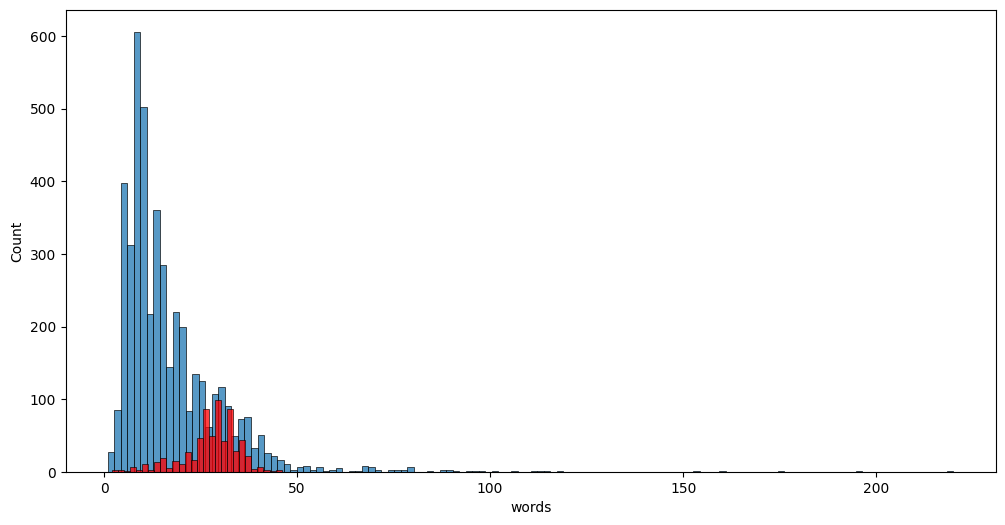

In [33]:
#to visualize the distribution of a dataset and identify any patterns, anomalies, or skewness in the data.
plt.figure(figsize=(12,6))
sns.histplot(df[df['label']==0]['words'])
sns.histplot(df[df['label']==1]['words'],color='red')
plt.show()

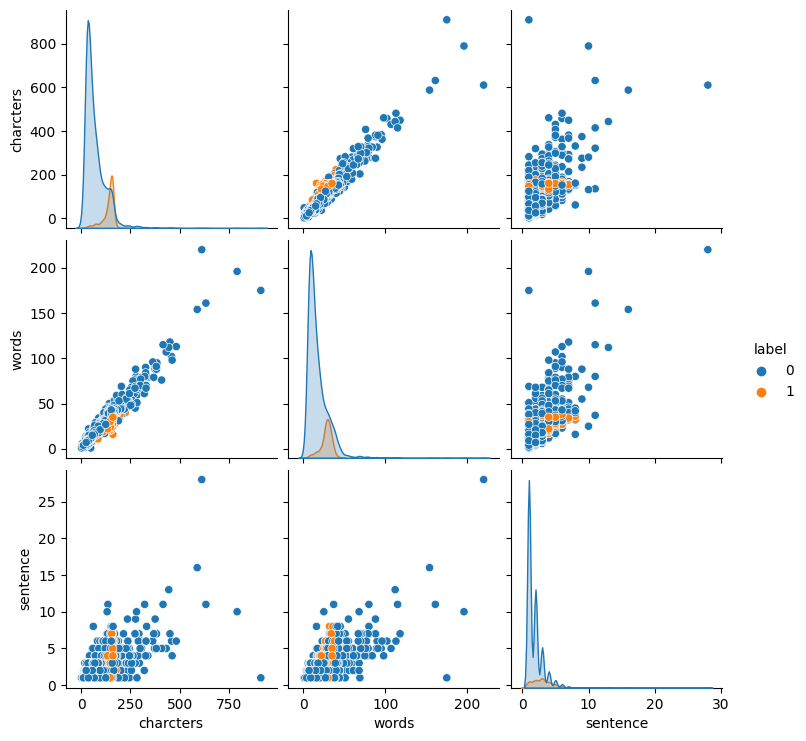

In [34]:
sns.pairplot(df,hue='label')

C:\Users\HP\AppData\Local\Temp\ipykernel_11260\2143676839.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


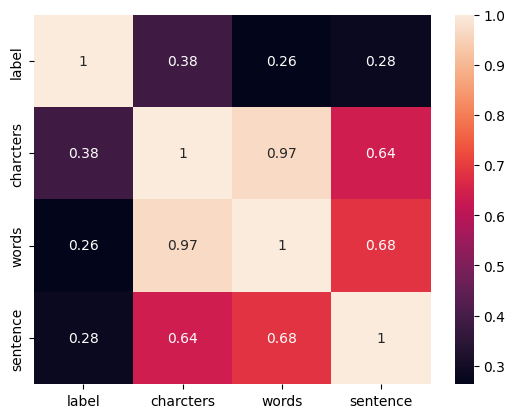

In [35]:
#for finding the corr relation 
sns.heatmap(df.corr(),annot=True)
plt.show()

# 3 Data Preprocessing

In [36]:
#Lower case
#Tokenization
#Removing special characters
#Removing stop words and punctuation
#Stemming

In [37]:
from nltk.corpus import stopwords
stopwords.words('english')
import string
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [38]:
def transform_text(text):
    text=text.lower()#Lower case
    text=nltk.word_tokenize(text)#Tokenization
    y=[]
    for i in text:#Removing special characters
        if i.isalnum():
            y.append(i)
    text= y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:#Removing stop words and punctuation

            y.append(i)
    text= y[:]
    y.clear() 
    for i in text:
        y.append(ps.stem(i))#Stemming
    return " ".join(y)

In [39]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [40]:
# now we create a columns transformed text 
#then we combine it actual data
df['transformed_text'] = df['text'].apply(transform_text)


In [41]:
df.head()

,label,text,charcters,words,sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
! pip install wordcloud


You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [43]:
#Word clouds are used in machine learning to visually represent the frequency of words in a text dataset, allowing for easy identification of common words and overall themes or topics.
from wordcloud import WordCloud

In [44]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [45]:
# for spam
spam=wc.generate(df[df['label']==1]['transformed_text'].str.cat(sep=" "))

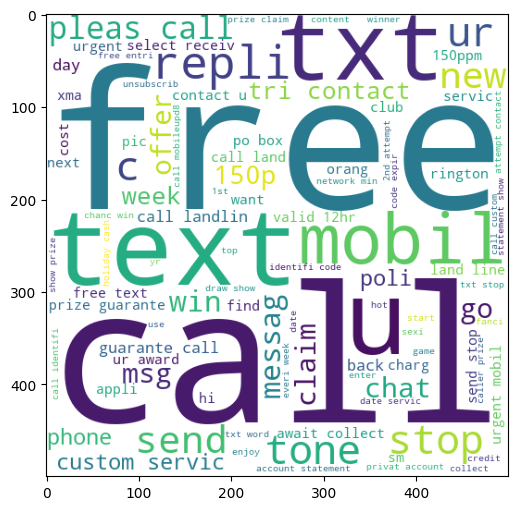

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(spam)

In [47]:
# for ham
ham=wc.generate(df[df['label']==0]['transformed_text'].str.cat(sep=" "))

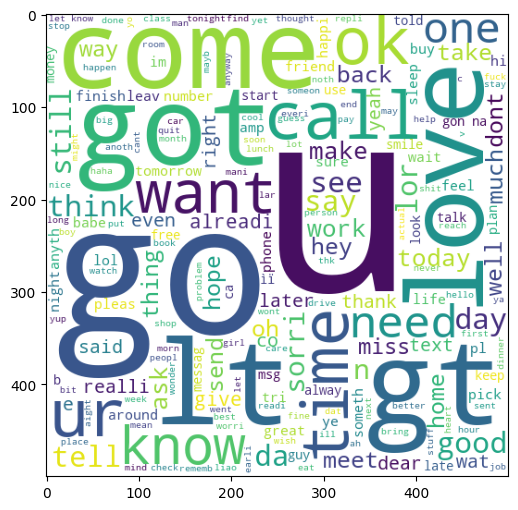

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(ham)

# 4. Model Building


In [49]:
# now we convert the text into array
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
tdif=TfidfVectorizer()

In [51]:
x=tdif.fit_transform(df['transformed_text']).toarray()

In [52]:

x.shape

(5169, 6708)

In [53]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
y=df['label'].values

In [55]:
y

array([0, 0, 1, ..., 0, 0, 0])

***we split data into training data and testing data***

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,random_state=2,test_size=0.2)

In [58]:
Xtrain.shape,Xtest.shape

((4135, 6708), (1034, 6708))

In [59]:
Xtrain[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [60]:
Ytest[4]

1

In [66]:
#There are number of classification algorithm in machine learning 
# so we can check which algorithm will give better result on sms spam detection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score ,precision_score

In [67]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [68]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [69]:
def train_classifier(clfs,Xtrain,Ytrain,Xtest,Ytest):
    clfs.fit(Xtrain,Ytrain)
    Y_pred=clfs.predict(Xtest)
    accuracy=accuracy_score(Ytest,Y_pred)
    precision = precision_score(Ytest,Y_pred)
    return accuracy , precision

In [70]:
train_classifier(svc,Xtrain,Ytrain,Xtest,Ytest)

(0.9729206963249516, 0.9741379310344828)

In [71]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, Xtrain,Ytrain,Xtest,Ytest)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.9738878143133463
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9690522243713733
Precision -  0.9344262295081968


In [72]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [73]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [74]:
voting.fit(Xtrain,Ytrain)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [75]:
y_pred = voting.predict(Xtest)
print("Accuracy",accuracy_score(Ytest,y_pred))
print("Precision",precision_score(Ytest,y_pred))

Accuracy 0.9787234042553191
Precision 0.9915254237288136


In [76]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [77]:
from sklearn.ensemble import StackingClassifier

In [78]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [79]:
clf.fit(Xtrain,Ytrain)
y_pred = clf.predict(Xtest)
print("Accuracy",accuracy_score(Ytest,y_pred))
print("Precision",precision_score(Ytest,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [80]:
import pickle
pickle.dump(tdif,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [81]:
new_test=Xtest[4]
input_data_as_numpy_array=np.asarray(new_test)
# reshape the np array as we are predicting for one instance
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
prediction=lrc.predict(input_data_reshape)
if(prediction[0]==0):
    print(" the element is ham")
else:
    print(" the element is spam")
    

 the element is spam


### 